# Experience Curve

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# import statsmodels.formula.api as smf
# import statsmodels.api as sm
# import sympy as sym
## 필요한 모든 Library는 모두 experience_curve.py에 들어있음

## Load Data

In [2]:
ec = pd.read_csv('energy_consumption.csv') # X, Independant Variable
pm = pd.read_csv('pm2000~2014.csv') # y, Dependant Variable

In [3]:
ec.head()

,country,1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,0.0275323668,0.0300271196,0.0319028469,0.0383597992,0.0385399495,0.0383360639,0.0397743992,0.0632535514,0.111760517,...,0.0350382787,0.0581461752,0.096181993,0.11938371,0.160654318,0.147714237,0.123743791,0.113764752,0.125947426,0.13716179
1,Albania,0.162006203,0.161111796,0.163452164,0.167262148,0.169799657,0.169093007,0.166582804,0.166435467,0.169201171,...,0.0979326461,0.10642438,0.115987938,0.128290933,0.106119661,0.105394281,0.12833692,0.11639143,0.116566021,0.123830648
2,Algeria,0.785435786,0.667751229,0.976265482,1.074399584,1.148359305,1.050719371,1.073800371,1.14933362,1.223927158,...,1.558859587,1.686018342,1.783483519,1.794157563,1.939508361,2.11305401,2.039024774,2.294537986,2.33834847,2.355316377
3,American Samoa,0.006,0.007,0.01,0.006,0.007,0.007,0.006716584,0.00697300887,0.00677881425,...,0.0086069555,0.0086305362,0.0086069555,0.0086069555,0.0049115089,0.00492496563,0.0049115089,0.0049115089,0.0049115089,0.00498638769
4,Angola,0.0577704417,0.0579672914,0.0622124028,0.0654400109,0.059392,0.0724902,0.072812152,0.074394417,0.0771766576,...,0.193559427,0.227171969,0.25855403,0.279244663,0.294645721,0.328756792,0.347379502,0.372059583,0.383570718,0.360949782


In [4]:
ec.shape # 230 Countries and 38 years

(230, 38)

In [5]:
pm.head()

,country,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
0,Afghanistan,8.2,9.4,10.3,10.5,10.4,10.4,10.2,10.3,9.9,9.6,9.8,10.0,10.5,10.0,9.9
1,Albania,14.8,13.6,13.9,13.8,13.6,13.4,13.0,13.5,13.0,13.8,13.2,14.0,13.4,12.3,10.2
2,Algeria,8.0,8.0,8.5,8.9,8.9,8.9,8.3,8.2,7.8,7.7,7.7,7.5,7.4,6.7,6.8
3,American Samoa,3.3,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,3.4,1.1,1.1
4,Andorra,3.3,6.4,6.4,6.3,6.1,6.0,11.5,15.4,15.5,6.0,7.0,6.9,7.6,1.9,1.4


In [6]:
pm.shape # 212 Countries and 16 years

(212, 16)

## Data Proprecessing

In [7]:
# Set index by Country
pm = pm.set_index('country')
ec = ec.set_index('country')

In [8]:
# Adjusting Same Country with different name
pm = pm.rename(
    {'South Korea':'Korea, South',
     'North Korea':'Korea, North',
     'The Bahamas':'Bahamas, The',
     'The Gambia':'Gambia, The',
     'Viet Nam':'Vietnam',
     'United States of America':'United States'}, 
    axis='index')
ec = ec.rename(
    {'Cote dIvoire (IvoryCoast)':"Cote d'Ivoire"},
    axis='index'
)

In [9]:
# Adjust Column of ec (Year) from 1980~2016 to 2000~2014
ec = ec[[str(year) for year in range(2000,2015)]]

# Convert column data type from str to int
pm.columns = [int(year) for year in pm.columns]
ec.columns = [int(year) for year in pm.columns]

# replace nan to 0
ec = ec.replace('--',0).applymap(lambda x : float(x))

# delete all zero index
ec = ec.iloc[np.where(ec.mean(1) != 0)[0]]

# Delete Cum(X)_2014 < 5 countries
ec = ec[ec.cumsum(axis=1)[2014] >= 5]

# Adjust same Country with Energy Consumption and PM2.5
ec = ec.loc[sorted(set(ec.index).intersection(set(pm.index)))]
pm = pm.loc[sorted(set(ec.index).intersection(set(pm.index)))]

In [10]:
ec.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,
Algeria,1.270024,1.275945,1.318908,1.329436,1.302262,1.498571,1.572293,1.558860,1.686018,1.783484,1.794158,1.939508,2.113054,2.039025,2.294538
Argentina,2.765447,2.714657,2.553975,2.769137,2.976641,3.128965,3.326177,3.385821,3.517413,3.433715,3.573104,3.652855,3.718580,3.772711,3.787929
Australia,4.642247,4.844912,4.945131,4.941750,5.061145,5.190180,5.309194,5.520583,5.450711,5.584535,5.264382,5.690470,5.725894,5.726781,5.744000
Austria,1.379214,1.445246,1.446379,1.470102,1.528894,1.587368,1.567932,1.545721,1.546637,1.472590,1.514554,1.443060,1.487581,1.491812,1.446927
Azerbaijan,0.507595,0.446193,0.532377,0.567715,0.626104,0.648468,0.657036,0.541696,0.579044,0.544011,0.587322,0.555522,0.603245,0.567599,0.585457
Bahrain,0.381740,0.395186,0.421560,0.440444,0.456248,0.511836,0.546223,0.560664,0.587815,0.582107,0.587808,0.581575,0.625183,0.695772,0.679124
Bangladesh,0.502978,0.553376,0.579817,0.637517,0.659434,0.700505,0.749207,0.790252,0.853419,0.902826,0.954178,0.999260,1.086119,1.112482,1.163839
Belarus,1.093173,1.014332,0.982912,1.027312,0.960695,1.080847,1.154444,1.119209,1.133309,1.054926,1.121975,1.161306,1.171888,1.119947,1.121458
Belgium,2.703257,2.685859,2.686603,2.778418,2.810226,2.791035,2.782607,2.808076,2.879473,2.633440,2.830048,2.646151,2.576454,2.649932,2.480996


In [11]:
pm.head(10)

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
country,,,,,,,,,,,,,,,
Algeria,8.0,8.0,8.5,8.9,8.9,8.9,8.3,8.2,7.8,7.7,7.7,7.5,7.4,6.7,6.8
Argentina,5.3,5.6,5.2,5.1,5.2,5.3,5.6,5.6,6.1,5.6,5.5,5.0,4.9,4.5,4.7
Australia,2.5,2.5,2.8,3.1,2.8,2.6,2.6,2.9,2.8,2.8,2.8,2.9,2.7,2.1,2.0
Austria,14.3,13.8,14.5,16.4,16.4,16.4,15.8,15.4,12.6,12.5,12.3,13.9,13.4,12.7,11.9
Azerbaijan,12.0,11.6,11.2,10.3,10.1,10.0,10.6,10.9,10.9,11.1,11.0,11.2,10.9,11.0,10.6
Bahrain,6.7,7.5,7.8,7.8,8.1,8.5,9.5,10.1,10.5,10.8,10.7,10.6,10.9,9.8,9.8
Bangladesh,17.0,18.0,19.3,20.7,21.6,22.5,23.6,25.4,26.8,28.0,28.9,28.9,29.6,30.5,31.4
Belarus,16.2,15.5,15.4,16.2,15.3,14.4,16.0,15.9,13.7,12.1,13.1,13.5,13.2,11.4,11.2
Belgium,16.3,15.4,15.5,16.3,16.6,16.9,16.8,15.8,15.2,14.9,14.9,15.8,15.6,14.6,13.5


In [12]:
# concatenate
df = pd.concat((ec.stack(), pm.stack()), axis=1)
df.columns = ['Energy Consumption', 'PM2.5']

In [13]:
df.head(20)

Energy Consumption  PM2.5
country                                  
Algeria   2000            1.270024    8.0
          2001            1.275945    8.0
          2002            1.318908    8.5
          2003            1.329436    8.9
          2004            1.302262    8.9
          2005            1.498571    8.9
          2006            1.572293    8.3
          2007            1.558860    8.2
          2008            1.686018    7.8
          2009            1.783484    7.7
          2010            1.794158    7.7
          2011            1.939508    7.5
          2012            2.113054    7.4
          2013            2.039025    6.7
          2014            2.294538    6.8
Argentina 2000            2.765447    5.3
          2001            2.714657    5.6
          2002            2.553975    5.2
          2003            2.769137    5.1
          2004            2.976641    5.2

In [14]:
df['ce'] = df['Energy Consumption'].unstack().cumsum(1).stack()
df = df.replace(0,np.nan).dropna()
df['lnpm'] = np.log(df['PM2.5'])
df['lnce'] = np.log(df['ce'])
df.index.names = ['Country', 'year']

df.head()

Energy Consumption  PM2.5        ce      lnpm      lnce
Country year                                                         
Algeria 2000            1.270024    8.0  1.270024  2.079442  0.239036
        2001            1.275945    8.0  2.545969  2.079442  0.934511
        2002            1.318908    8.5  3.864876  2.140066  1.351930
        2003            1.329436    8.9  5.194312  2.186051  1.647564
        2004            1.302262    8.9  6.496574  2.186051  1.871275

In [26]:
# Prepare ExpCurve Analysis for India
korea_df = df.loc['Korea, South'].reset_index()
korea_df

,year,Energy Consumption,PM2.5,ce,lnpm,lnce
0,2000,8.056699,20.1,8.056699,3.000720,2.086504
1,2001,8.238372,20.5,16.295071,3.020425,2.790863
2,2002,8.568981,21.2,24.864052,3.054001,3.213423
3,2003,8.875913,22.3,33.739965,3.104587,3.518683
4,2004,9.103983,22.9,42.843947,3.131137,3.757564
5,2005,9.523355,23.4,52.367302,3.152736,3.958282
6,2006,9.730083,23.0,62.097385,3.135494,4.128704
7,2007,10.145711,23.7,72.243096,3.165475,4.280037
8,2008,10.292576,23.1,82.535672,3.139833,4.413231
9,2009,10.392500,22.1,92.928172,3.095578,4.531827


## Kinked Experience Curve Analysis

In [18]:
from experience_curve import *

In [27]:
kinked_year, r_sq = get_kinked_year(korea_df, 'year', 'lnce', 'lnpm')
kinked_year

2009

In [28]:
r_sq

[0,
 0,
 0.41782492818609673,
 0.6603618829651002,
 0.7918740667483923,
 0.8730136838695239,
 0.9017094072335788,
 0.9353120606396947,
 0.9360152458334599,
 0.9382928754785984,
 0.8937240275018211,
 0.6619336953680406,
 0.4608315174832356,
 0.29539453412139294,
 0.14152708323737762]

Text(2006, 0.8, 'Kinked Year : 2009')

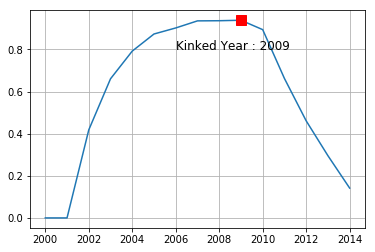

In [45]:
fig, ax = plt.subplots()
f = pd.Series(data=r_sq, index = india_df['year'].values)
f.plot(ax=ax, grid=True)
plt.plot(kinked_year, f[kinked_year], marker='s',
        color='r', ms=10)
plt.annotate('Kinked Year : {}'.format(kinked_year), (2006, 0.8),
            fontsize=12)

In [35]:
pd.Series(data=r_sq, index = india_df['year'].values).idxmax()

2009